In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
class K_Means:
    def __init__(self,cluster=10,max_iter=100):
        self.cluster = cluster
        self.max_iter= max_iter
    def cluster_group(self,dataset):
        self.row = dataset.shape[0]
        self.dataset = dataset
        random_row = np.random.choice(self.row,self.cluster,replace=False)
        centroid = dataset.iloc[random_row].values
        for k in range(self.max_iter):
            
            distance_random_row = []
            for row in centroid:
                distances = []
                for i in range(self.row):
                    distance = np.sqrt(np.sum((row-dataset.iloc[i].values)**2))
                    distances.append(distance)
                distance_random_row.append(distances)
            distance_random_row = np.array(distance_random_row)
            points_which_cluster = np.argmin(distance_random_row,axis=0)
            cluster_group = []
            for i in range(self.cluster):
                group = []
                for j in range(self.row):
                    if(points_which_cluster[j]==i):
                        group.append(j)
                cluster_group.append(group)
            #print(cluster_group)
            new_centroid = []
            
            for idx, clu_part in enumerate(cluster_group):
                if (len(clu_part)==0):
                    new_centroid.append(centroid[idx])
                    continue
                mean = np.mean(dataset.iloc[clu_part].values,axis=0)
                new_centroid.append(mean)
            new_centroid = np.array(new_centroid)
            old_centroid = np.array(centroid)
            if np.allclose(old_centroid, new_centroid, atol=1e-6):
                break
            centroid = new_centroid.copy()
        self.cluster_group = cluster_group
        self.centroid = centroid
        return self.cluster_group, self.centroid
    def give_cluster(self,test_dataset):
        self.test_dataset = test_dataset
        test_row = self.test_dataset.shape[0]
        centroid_distance_test= []
        
        for cent in self.centroid:
            distance_test = []
            for points in range(test_row):
                p1 = self.test_dataset.iloc[points]
                distance_measure = np.sqrt(np.sum((p1-cent)**2))
                distance_test.append(distance_measure)
            centroid_distance_test.append(distance_test)
        points_index_test  = np.argmin(centroid_distance_test,axis=0)
        test_cluster_group = []
        for i in range(len(self.centroid)):
            group_test = []
            for idx, point in enumerate(points_index_test):
                if(point==i):
                    group_test.append(idx)
            test_cluster_group.append(group_test)
    


        return test_cluster_group
    
        
                    
class Elbon:
    def __init__(self):
        pass
    def start(self,dataset,cluster_value=4):
        self.cluster_value = cluster_value
        self.dataset = dataset
        self.wcss = []
        for number in range(1,self.cluster_value+1):
            knn_start = K_Means(number)
            self.cluster_group,self.centroid = knn_start.cluster_group(self.dataset)
            #print(self.cluster_group)
            #print(self.centroid)
            k = 0
            centroid_distance_point = []
            for group in self.cluster_group:
                
                distance_sum = 0
                for point in group:
                    point_row = self.dataset.iloc[point]
                    dis = np.sum((point_row-self.centroid[k])**2)
                    distance_sum = distance_sum + dis
                centroid_distance_point.append(distance_sum)
           
                k = k+1
            wcss_value = np.sum(centroid_distance_point)
            self.wcss.append(wcss_value)
            
        self.wcss = np.array(self.wcss)
        return self.wcss
    
    def plot_graph(self):
        x_axis_value = np.arange(1,self.cluster_value+1)
        print(x_axis_value)
        colour = ['red','blue','green','yellow','black','white']
        colors = np.random.choice(colour,replace=False)
        print(colors)
        plt.plot(x_axis_value,self.wcss,color=colors)
        plt.xlabel('No of cluster')
        plt.ylabel("Centroid value from each cluster point")
    
                
        
        
            
                
        

[1 2 3 4 5 6]
black


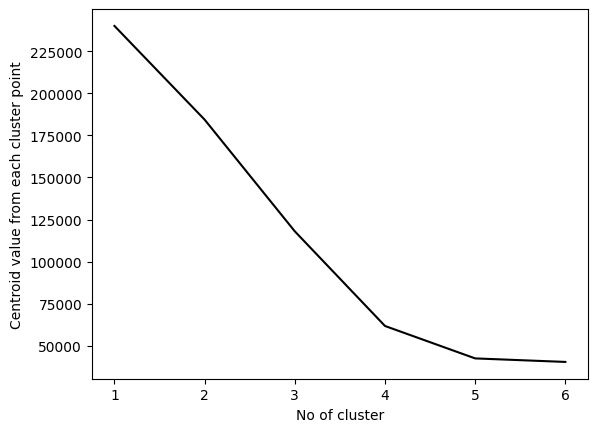

In [23]:
d1 = pd.read_csv('unsupervised_data.csv')
d1 = d1.iloc[:,1:]
s = Scaler()
s.scale(d1)
d1 =s.transform(d1)
e=Elbon()
e.start(d1,cluster_value=6)
e.plot_graph()

In [2]:
class Scaler:
    def __init__(self):
        self.mean = None
        self.std = None
        
    def scale(self,dataset):
        
        self.mean = dataset.mean()
        self.std = dataset.std()
        
    
    def transform(self,dataset):
        new_dataset = (dataset-self.mean)/(self.std)
        return new_dataset
    

In [4]:
d1 = pd.read_csv('unsupervised_data.csv')
d1 = d1.iloc[:,1:]
s = Scaler()
s.scale(d1)
d1 =s.transform(d1)
a= K_Means(cluster=6)
a.cluster_group(d1)
group = a.give_cluster(d1)

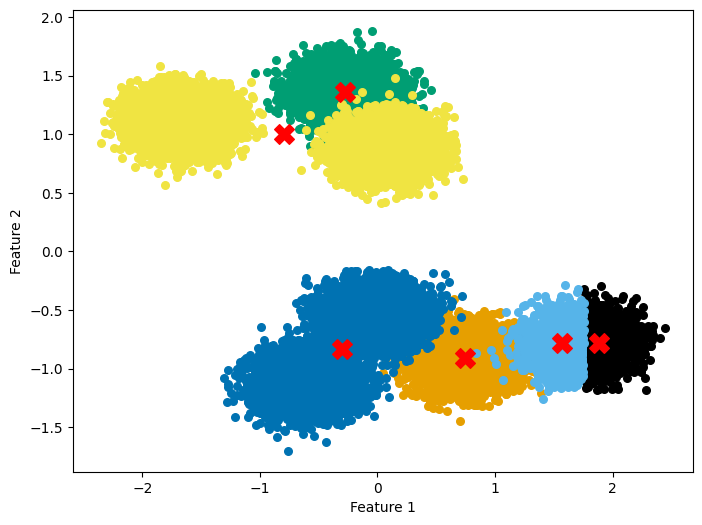

In [5]:
plt.figure(figsize=(8, 6))

colors = [
    '#000000',  # Black
    '#E69F00',  # Orange
    '#56B4E9',  # Sky Blue
    '#009E73',  # Bluish Green
    '#F0E442',  # Yellow
    '#0072B2',  # Blue
    '#CC79A7',  # Purple
    '#999999',  # Gray
    '#D55E00'   # Vermillion
]

for k, cluster in enumerate(group):
    for row in cluster:
        point = d1.iloc[row]
        plt.scatter(point.iloc[0], point.iloc[1], color=colors[k], s=30)


for cent in a.centroid:
    plt.scatter(cent[0], cent[1], color='red', marker='X', s=200)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()